# SOLUTION 
# Python Exercise: Data Exploration and Preparation

### Learning objectives
- Use Python (Pandas) to read data from a CSV file.
- Use Python (Seaborn) to do exploratory data analysis
- Implement a typical data pre-processing step: Standardization


## Tips: How to write code when you're new to a language and/or package

- search and download a cheatsheet (find them online or on our Moodle page)  
- look at online examples  
- use a search engine. Many problems have excellent solutions on http://stackoverflow.com/  
- ask colleagues or write on the forum. 
- Come to the exercise session and discuss different approaches!
- use chatGPT or Code-Llama (probably the fastest way nowadays, but don't let you fool, you still need to understand what you're doing)

### Dataset:  
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database 

*This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.*


### Code
Inspired from various sources, in particular this one:

https://www.kaggle.com/code/tanyildizderya/diabetes-prediction-with-logistic-regression




In [3]:
# We use a few very common Python Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 

## Exercise
- Download the file 'diabetes_data.csv' from Moodle.  Make sure to place it in the same folder where this notebook is located 
- Use the Pandas library to read the file 'diabetes_data.csv' into a DataFrame (DF)

In [5]:
diabetes_data = pd.read_csv('diabetes_dataset.csv')


In [6]:
# show the first rows of the DF (use head)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# show the metadata (use info)
# How many rows and columns does your dataset have?

display(diabetes_data.info())
# very useful: shape!
display(diabetes_data.shape)

display(diabetes_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

(768, 9)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### shape of the dataset:
768 rows (=data points)  
9 columns: 8 "features", 1 "label" (Outcome)

## Explore the data !
After locking away the test data, but before running any algorithm, always do some exploratory analysis of your data (or a subset thereof if the dataset is large):
- visualize!
- (visually) identify null values, outliers, erronous entries
- classify the features (feature is the common term for a column in your dataframe) and outcome(s): are they continuous or categorical?
- visualize the distributions (histogram). This is important later, because some algorithms assume a gaussian distribution
- Is your dataset balanced? That is, do we have the same number of samples (rows) in the two classes *outcome=1* and *outcome=0* ?
- etc...

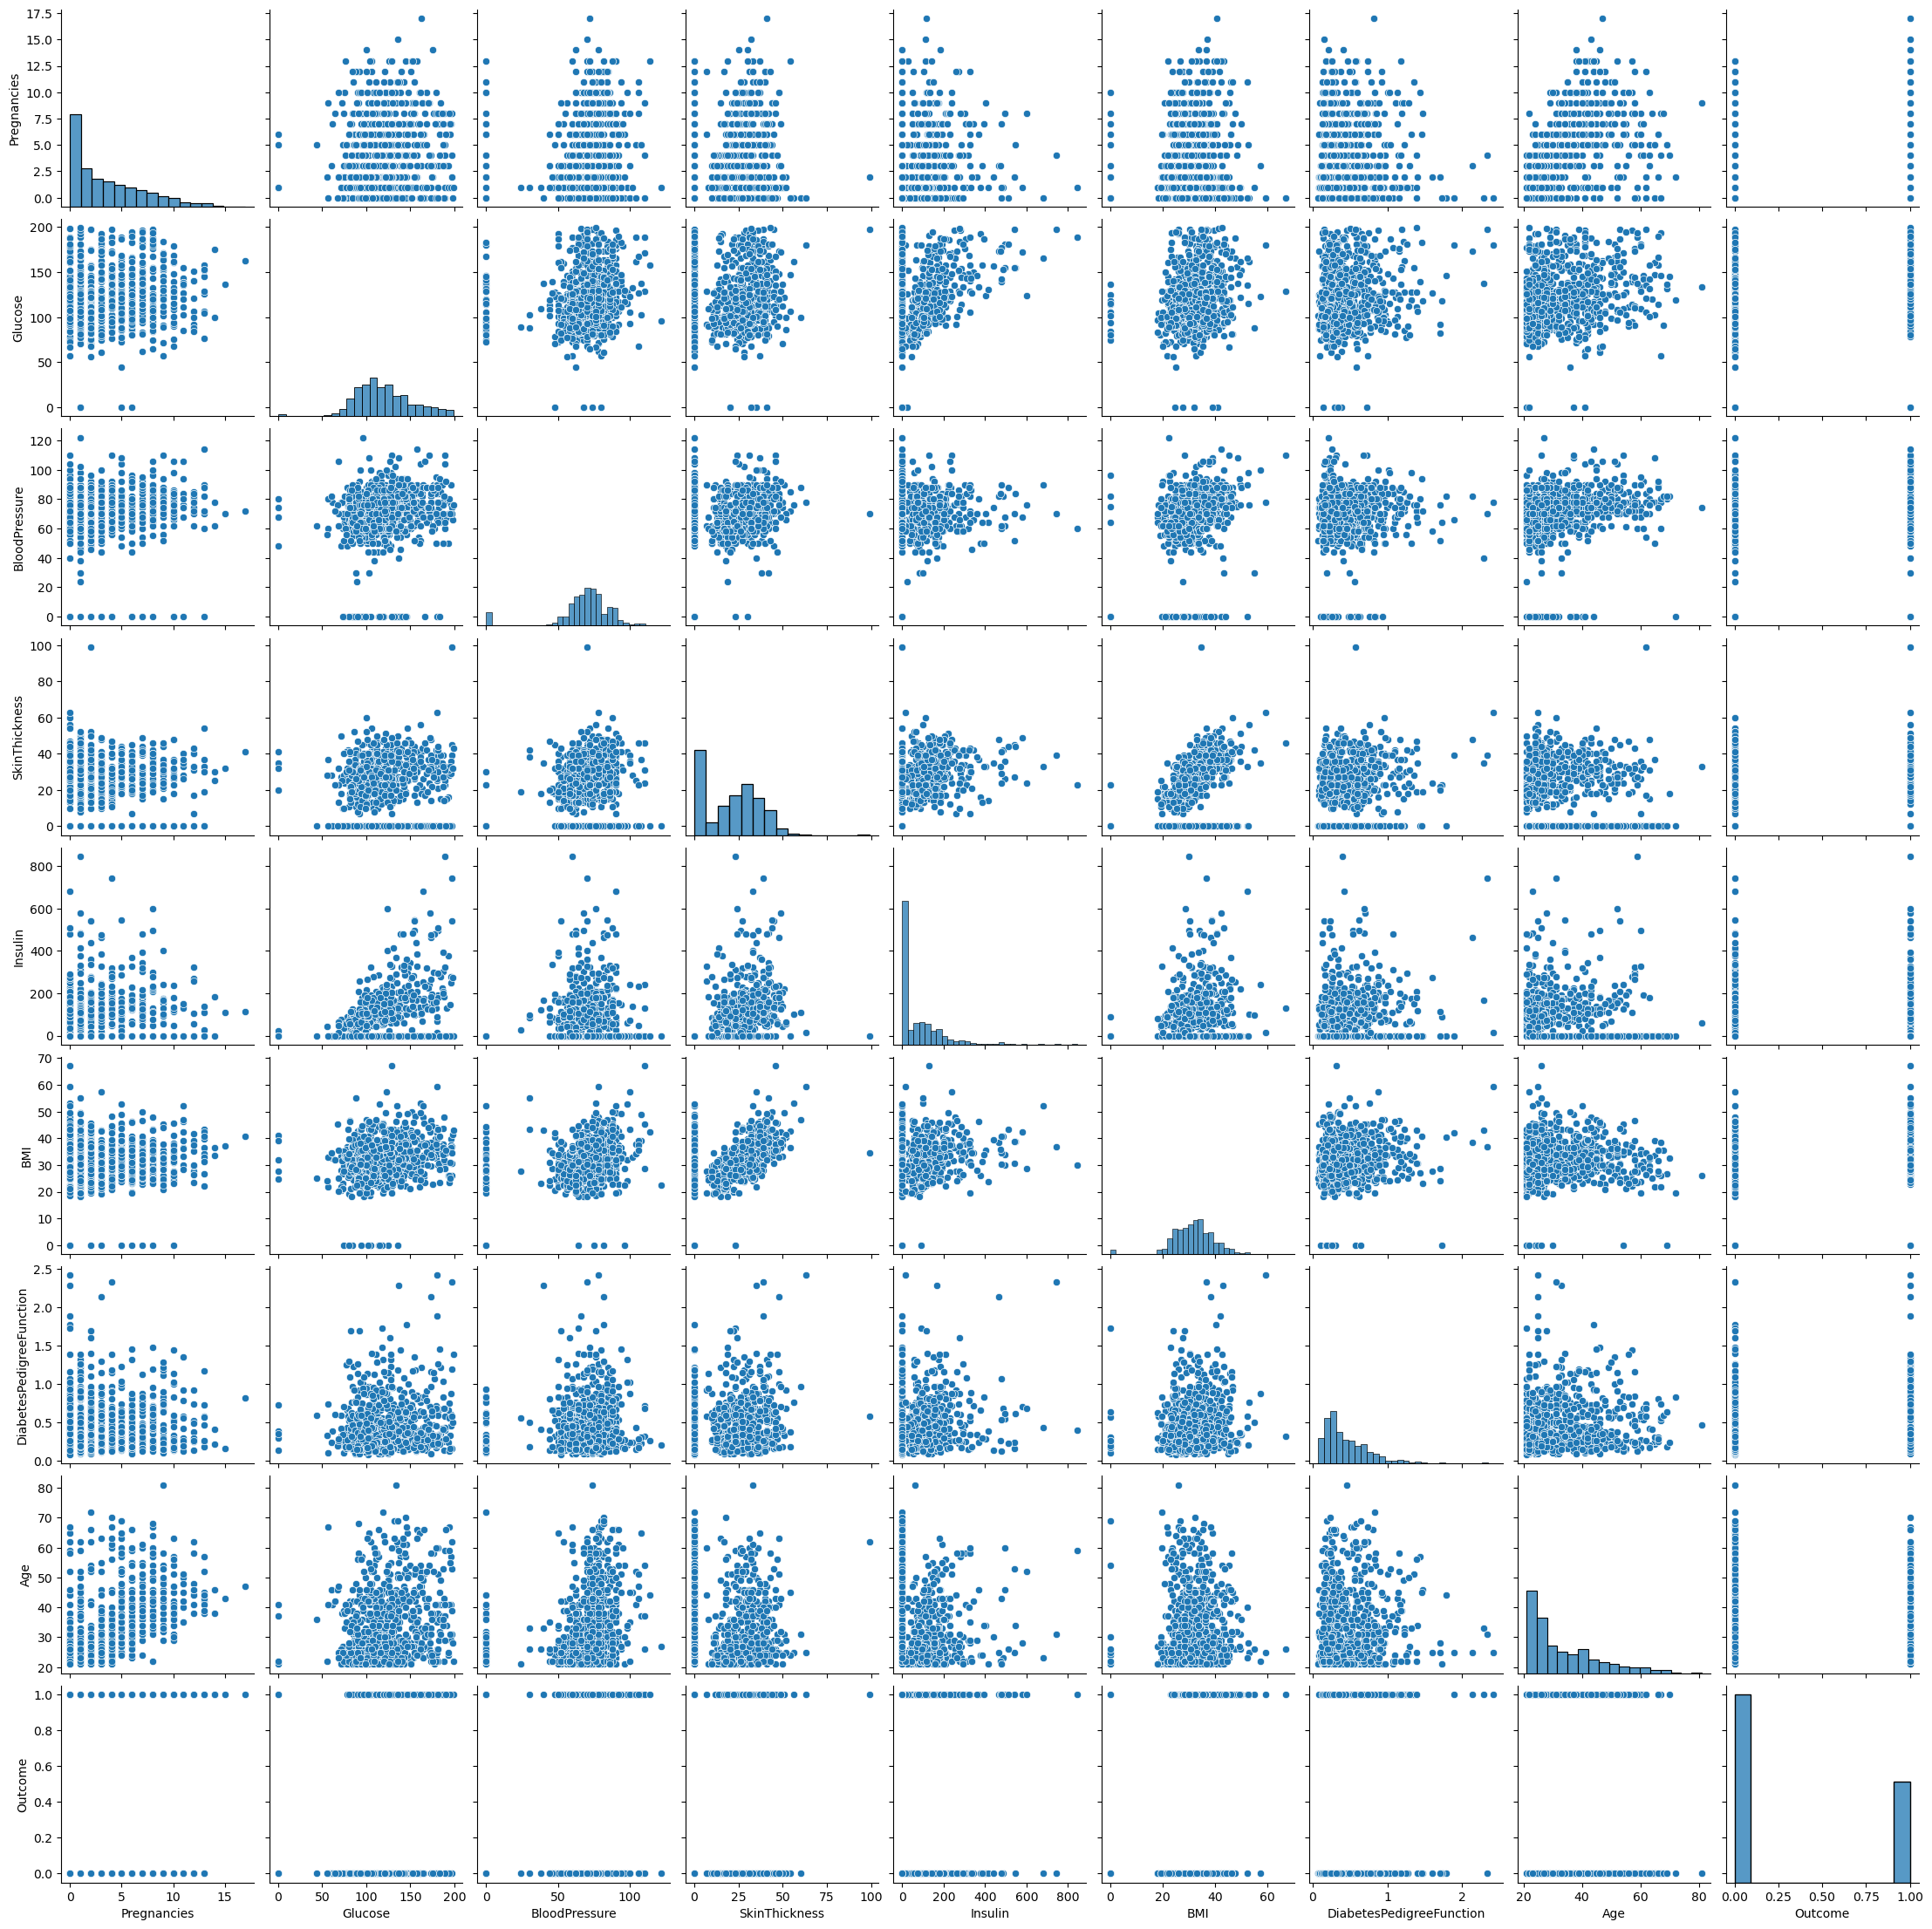

In [8]:
# just one example: look at the pairwise distribution. Identify correlated data
sns.pairplot(diabetes_data)

### Pairplots and correlations
Get some ideas how to plot data:
https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
  


### Exercise Data Exploration

excercise 1  
- Plot skin thinkness vs. BMI. 
- Comment your observation
- Quantify the linear relationship between the two features (hint: correlation coefficient)

exercise 2  
- make a guess which single feature could predict the outcome (the binary variable 'outcome' in your dataframe). 
- Visualize your hypothesis do the following: plot all datapoints (only that single feature) on a line. Use two different colors for the outcomes 0/1. Plot the datapoints using a low transparency (opacity, alpha).





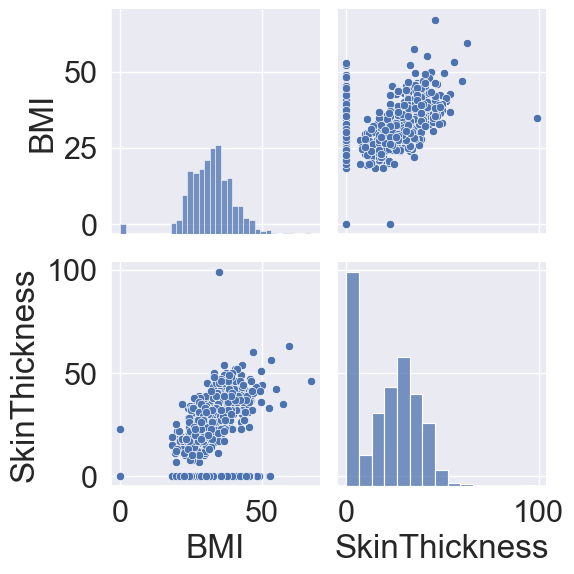

In [9]:
# possible solution: make a pairplot of a subset of variables:
sns.set(font_scale=2)
sns.pairplot(diabetes_data[['BMI', 'SkinThickness']], height=3)

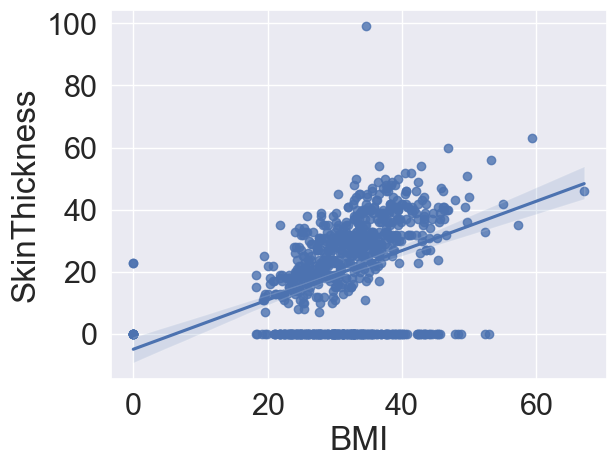

In [10]:
# other possibility (there are many more): 
sns.regplot(x='BMI', y='SkinThickness', data=diabetes_data);

# note that the presence of the many 0-values for SkinThickness,
# strongly affect the fitted line. Before calculating a model 
# to explain data, we need to clean the data.

### Discussion, Observations
- Just from 'looking at the data', we can identify patterns. For example BMI and skin-thikness are correlated 
- Not relevant now, good to know later: correlations could potentially cause  problems when applying Linear Regression. 
- In the regression plot above (sns.regplot) you should note that the presence of the many 0-values for SkinThickness, strongly affect the fitted line. Before calculating a model to explain data, we need to clean the data!
- It is important to decide how to treat 0-values (further below we replace 0 with the per-column median).
- Carefully examine the pairplot. Try to understand what is plotted. Go to the documentation to learn more.



#### exercise 2  
make a guess which single feature could predict the outcome (the binary variable 'outcome' in your dataframe).
Visualize your hypothesis do the following: plot all datapoints (only that single feature) on a line. Use two different colors for the outcomes 0/1. Plot the datapoints using a low transparency (opacity, alpha).


Text(0.5, 1.0, 'Glucose levels and outcome')

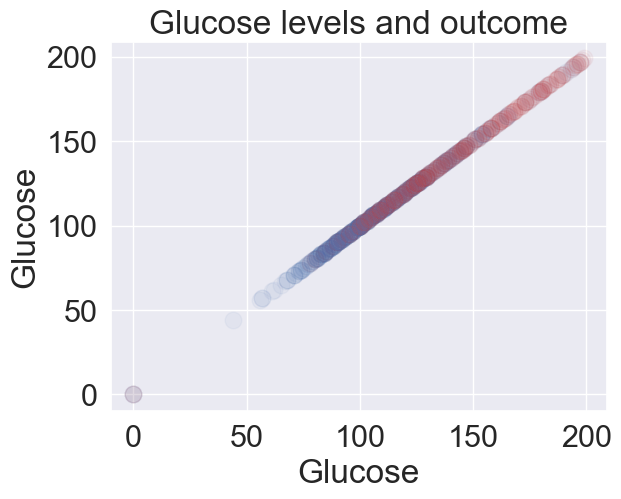

In [11]:
# many possible solutions. 
# attempt #1
# Here: demo of .query() 
# the boxplot below is a much better representation of the same information
df_outcome0 = diabetes_data.query('Outcome == 0')
df_outcome1 = diabetes_data.query('Outcome == 1')
plt.plot(df_outcome0[['Glucose']], df_outcome0[['Glucose']], 'ob', alpha = 0.05, markersize=12)
plt.plot(df_outcome1[['Glucose']], df_outcome1[['Glucose']], 'or', alpha = 0.05, markersize=12)
plt.xlabel('Glucose')
plt.ylabel('Glucose')
plt.title('Glucose levels and outcome')

Text(0.5, 1.0, 'Glucose levels and outcome')

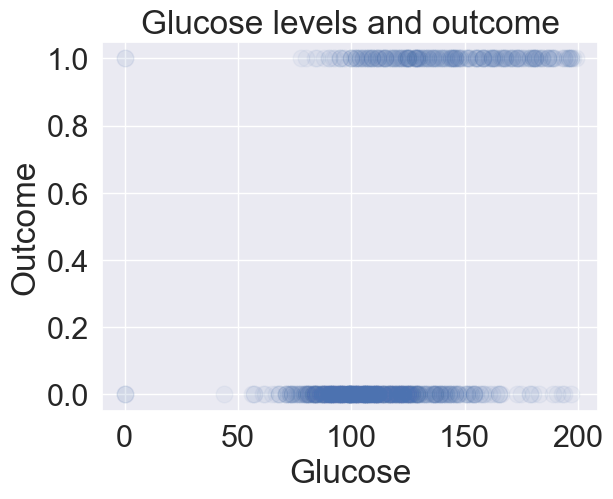

In [12]:
# many possible solutions. 
# attempt #2
plt.plot(diabetes_data[['Glucose']], diabetes_data[['Outcome']], 'ob', alpha = 0.05, markersize=12)
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.title('Glucose levels and outcome')

Text(0.5, 1.0, 'Different distributions of Glucose levels for different outcome')

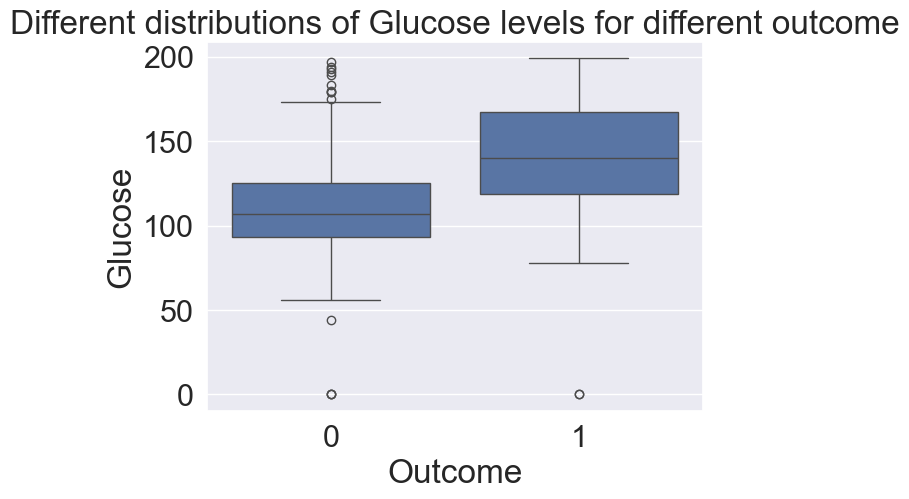

In [13]:
# possible solution #3: make a pairplot of a subset of variables:
sns.boxplot(x= 'Outcome', y='Glucose', data = diabetes_data)
plt.title('Different distributions of Glucose levels for different outcome')

#### exercise 3. Try/explore some of the following suggestions
- similar to exercise 2: Pick two features. Plot the points in a x/y plane. Draw the point at location (ftr1/ftr2) and use two different colors for outcomes 0/1
- Use a seaborn violin plot to compare the distributions of ONE feature for the two outcomes 0/1
https://seaborn.pydata.org/generated/seaborn.violinplot.html
- your idea...


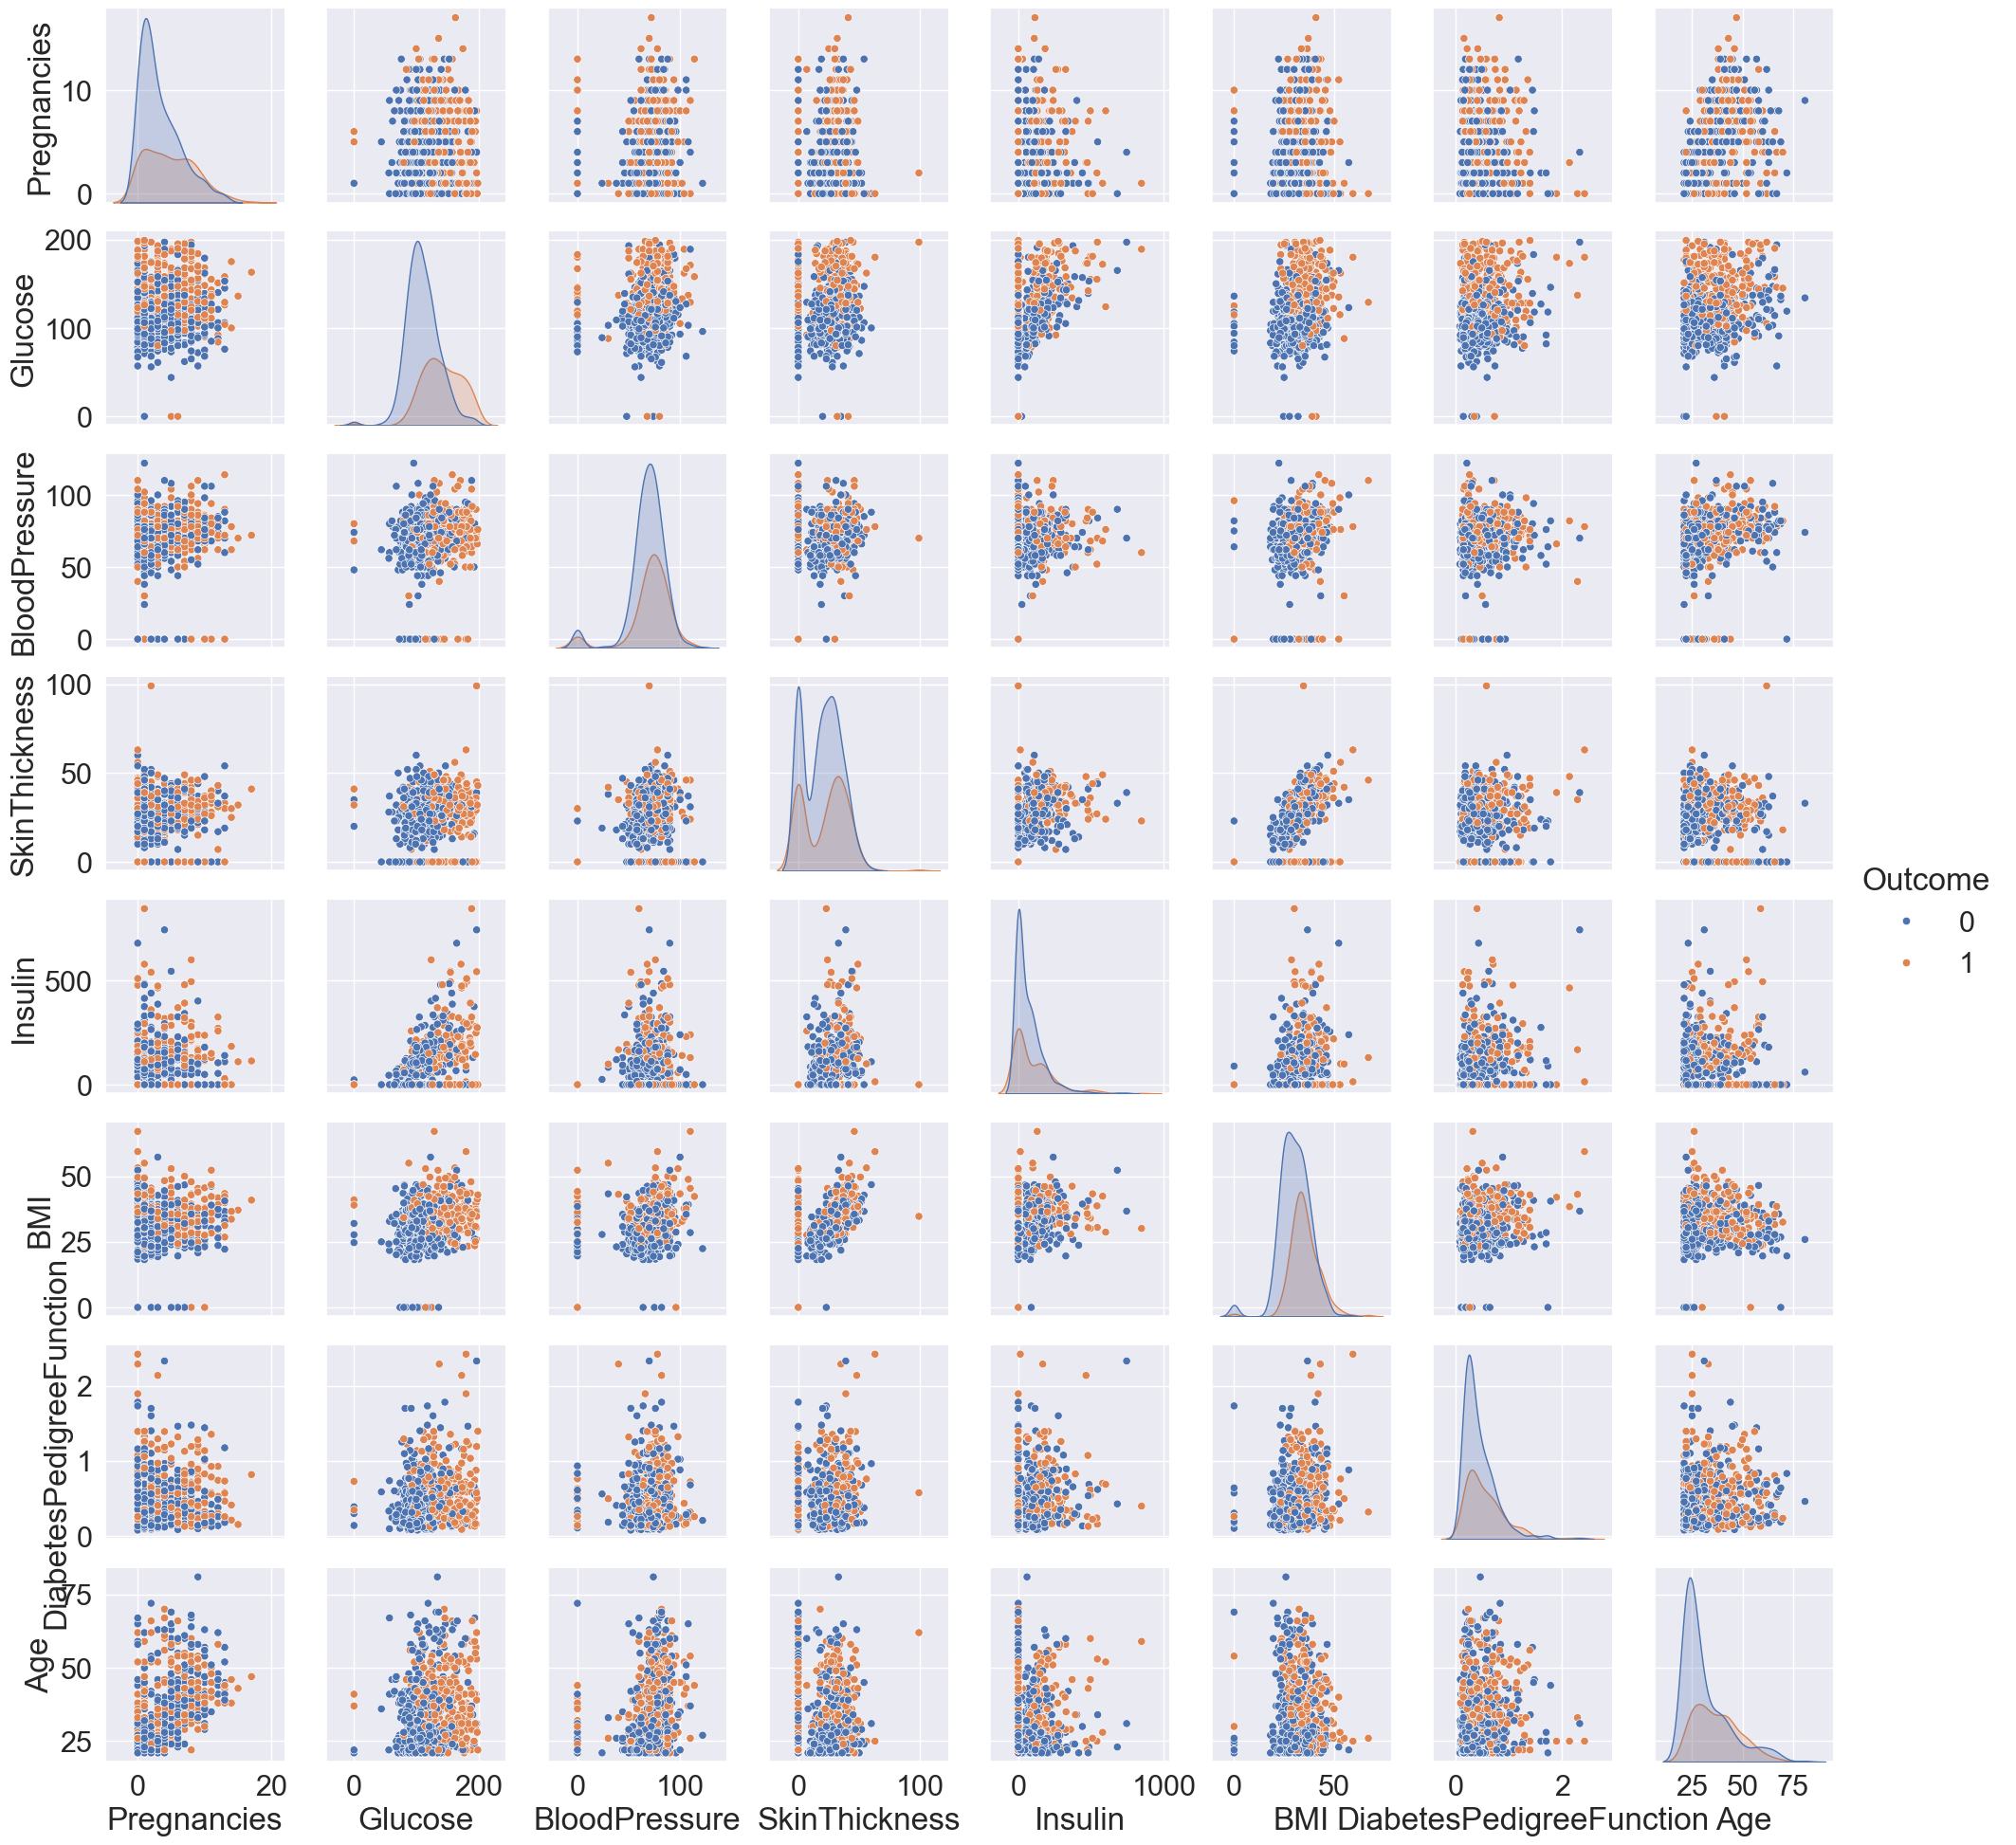

In [14]:
# pairplot has an interesting parameter: hue
# see doc: https://seaborn.pydata.org/generated/seaborn.pairplot.html
# We can pick two features or do it for all:
sns.pairplot(diabetes_data, hue='Outcome')

### Observations
For some features (for expl. 'glucose') the two distributions (Outcome=1 vs. Outcome = 0, drawn along the diagonal) are quite different. Such a feature is likely to 
contribute strongly to the prediction of the outcome. After modelling and fitting, we can come back and validate if the data corroborates this hypothesis.

<Axes: xlabel='Outcome', ylabel='Glucose'>

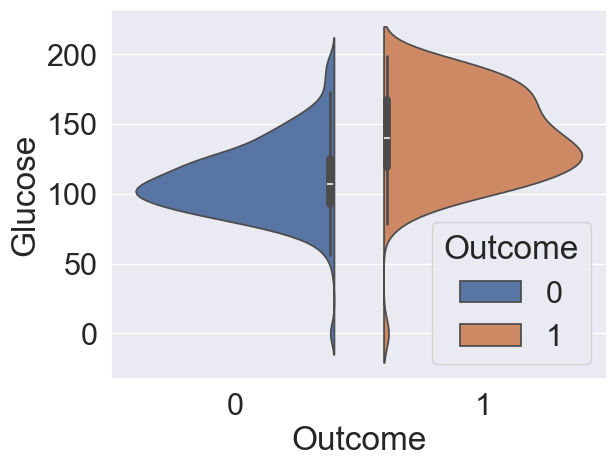

In [15]:
sns.violinplot(x='Outcome' , y='Glucose', data = diabetes_data, hue='Outcome', split=True)

<Axes: xlabel='Const1', ylabel='Glucose'>

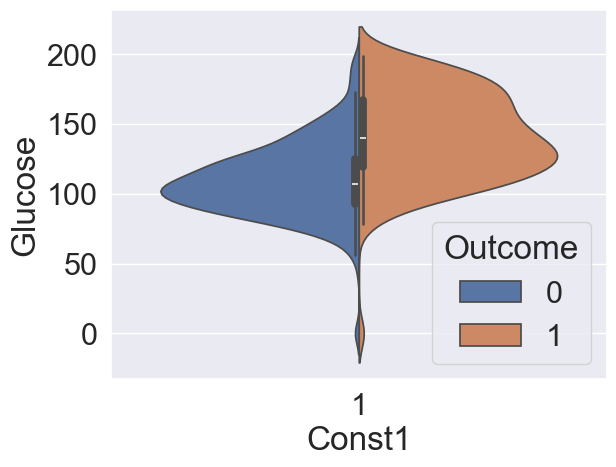

In [16]:
# we can apply a little trick to get ONE violin: it's easy to add a column to a DF:
diabetes_data['Const1'] = 1
# the plot it against this constant 1:
sns.violinplot(x='Const1' , y='Glucose', data = diabetes_data, hue='Outcome', split=True)

### Exercise: data cleansing. remove 0/null
Your data contains invalid values (0, null). Identify and remove them:

- Figure out how to identify these values your dataframe. Do not code a for-loop / if condition. Use a pandas function.
- Count: How many samples have at least one invalid entry?
- Should we **remove** these **rows** from the dataframe? Why? Why not?
- Discuss: Do we have other options?

In [17]:
# test a column for 0 (similarly, use any other predicate)
# we get a Pandas series with boolean values
bool_series = diabetes_data['BMI'] == 0
display(bool_series.head(3))
print('Info:')
bool_series.info()

nr0 = sum(bool_series)
print("\nNr of 0s in column BMI: {}\n".format(nr0))

# SELECT the rows where the predicate BMI!=0 is True
# store the resulting DataFrame in a new variable
diabetes_data_no0 = diabetes_data[diabetes_data['BMI'] != 0] 

# always inspect your results
display(diabetes_data_no0.info())

0    False
1    False
2    False
Name: BMI, dtype: bool

Info:
<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: BMI
Non-Null Count  Dtype
--------------  -----
768 non-null    bool 
dtypes: bool(1)
memory usage: 900.0 bytes

Nr of 0s in column BMI: 11

<class 'pandas.core.frame.DataFrame'>
Index: 757 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               757 non-null    int64  
 1   Glucose                   757 non-null    int64  
 2   BloodPressure             757 non-null    int64  
 3   SkinThickness             757 non-null    int64  
 4   Insulin                   757 non-null    int64  
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  757 non-null    float64
 7   Age                       757 non-null    int64  
 8   Outcome                   757 non-null    int64  
 9   Const1                    757 non-null    int64  
dtypes: fl

None

# optional: preprocessing Exercise
Before doing any ML, data usually needs some pre-processing. Here we replace invalid values and apply standardize the data:

1)  
Removing rows (samples) with invalid values is not a good idea. A better way to deal with invalid values (zeroes, null) is to replace them with the mean or median of the column.
- Replace the invalid values (zeroes) of the BMI-column with the median BMI. Hint: use the Pandas "replace" function
- be careful: 0 is not always an invalid value. A 0 in 'outcome' or in 'pregnancy' is a valid data.

2) 
Many ML algorithms work better if all data have the same "scale". It is therefore a common practice to standardize data. After Standardization, every column has $mean=0$, $std=1$
- Scale the data. You can implement this with Pandas or using sklearn.preprocessing.StandardScaler


In [20]:
# just in case you have modified your dataframe:
# load the dataset again before starting.
diabetes_data = pd.read_csv('diabetes_dataset.csv')
['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction']

In [21]:
diabetes_data['SkinThickness'].mean()

20.536458333333332

In [22]:
# some of the methods are simpler to use with Null instead of 0. so first replace 0 with null:
# note: do it only for selected columns!
diabetes_data['Glucose'].replace(to_replace = 0, value = np.nan, inplace=True)
diabetes_data['BloodPressure'].replace(to_replace = 0, value = np.nan, inplace=True)
diabetes_data['SkinThickness'].replace(to_replace = 0, value = np.nan, inplace=True)

# ... potentially more columns, but not all (eg. pregnancies, outcome, ...)

/var/folders/3f/by3v7tkd61b2v6znhx6pmzrc0000gn/T/ipykernel_77212/1378062983.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data['Glucose'].replace(to_replace = 0, value = np.nan, inplace=True)
/var/folders/3f/by3v7tkd61b2v6znhx6pmzrc0000gn/T/ipykernel_77212/1378062983.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

In [23]:
# DF has a median() function:
glucose_median = diabetes_data['Glucose'].median()
display(glucose_median)

117.0

In [24]:
# replace and validate result:
diabetes_data['Glucose'].replace(to_replace = np.nan, value = glucose_median, inplace=True)
diabetes_data['Glucose'].median()

117.0

In [25]:
# next we show a more advanced technique: Pipelines
# you are not suppposed to have come up with this approach. We just show it for completeness

In [26]:
# use SimpleImputer to replace NaN with per-column Median
# https://scikit-learn.org/stable/modules/impute.html
# note: for this dataset a multivariate imputer could make sense: 
# https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation
  
# instanciate a new SimpleImputer. It is called below inside a pipeline    
from sklearn.impute import SimpleImputer
medianImputer = SimpleImputer(missing_values=np.nan, strategy='median')

# remove the mean and scale to unit variance
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()

In [27]:
# now put the transformers into a pipeline 
from sklearn.pipeline import Pipeline
diabetes_pipeline = Pipeline([('medianImputer', medianImputer),('scaling', stdScaler)])
transformed_data = diabetes_pipeline.fit_transform(diabetes_data)


In [28]:
# after transformation, all columns have mean=0 and std=1

In [29]:
print('mean:\n{}'.format(np.mean(transformed_data, axis=0)))
print('std:\n{}'.format(np.std(transformed_data, axis=0)))

mean:
[-6.47630098e-17  4.62592927e-18  5.78241159e-18 -1.52655666e-16
 -3.00685403e-17  2.59052039e-16  2.45174251e-16  1.93132547e-16
  7.40148683e-17]
std:
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


note: this was just a quick demo. for real modelling, more steps are needed (e.g. train/test split, ...)